## Lookup Vanishing Gradient Problem

[Visualize](https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/)

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class DiabetesDataset(Dataset):
    
    def __init__(self):
        xy=np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
        self.X=Variable(torch.from_numpy(xy[:,:-1]))
        self.y=Variable(torch.from_numpy(xy[:,[-1]]))
        self.len=xy.shape[0]
        
    #required function for DataLoader
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
dataset=DiabetesDataset()
train_loader=DataLoader(dataset=dataset,
                       batch_size=32,
                       shuffle=True,
                       num_workers=2)

In [4]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1=nn.Linear(in_features=8, out_features=10)
        self.l2=nn.Linear(in_features=10, out_features=7)
        self.l3=nn.Linear(in_features=7, out_features=1)
        
        self.relu=nn.ReLU()
        self.sigmoid=nn.Sigmoid()
        
    def forward(self, x):
        out1=self.relu(self.l1(x))
        out2=self.relu(self.l2(out1))
        yhat=self.sigmoid(self.l3(out2))
        return yhat

In [5]:
model=Model()

In [6]:
criterion=nn.BCELoss(size_average=True)
optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

/home/ricky/miniconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [7]:
loss_ls=[]
for epoch in range(500):
    for data in train_loader:
    
        X, y = data
        
        yhat=model(X)
    
        loss=criterion(yhat, y)
        loss_ls.append(loss.data.item())
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

/home/ricky/miniconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


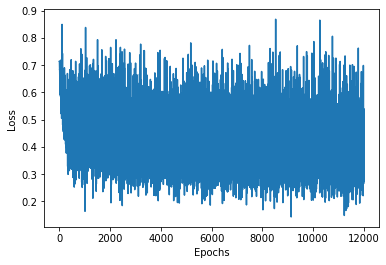

In [9]:
# plt.plot(np.arange(0,12000),loss_ls)
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

In [11]:
pred=model(X[20])

In [14]:
pred

tensor([0.9229], grad_fn=<SigmoidBackward>)